# Question 1

-multiplications requires to perform a matrix : nmk 

-additions to perform a matrix : nm(k-1)

-Matrix Multiplication involves multipling row of the matrix with corresponding column of the second matrix and summing up these   product

In [4]:
import numpy as np

# Question 2

In [5]:


def matrix_multiplication(A, B) :
    n, k = len(A), len(A[0])
    k, m = len(B), len(B[0])
    result = []
    for i in range(n):
        t = []
        for j in range(m):
            x = 0
            for l in range(k):
                x += A[i][l] * B[l][j]
            t.append(x)
        result.append(t)
                
    return result


In [6]:
A = np.random.rand(100, 200)
B = np.random.rand(200, 100)

In [7]:
%%timeit

matrix_multiplication(A, B)

1.7 s ± 38.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [8]:
%%timeit

np.matmul(A, B)

452 µs ± 50 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


-NumPy uses highly optimized linear algebra libraries like BLAS (Basic Linear Algebra Subprograms) and LAPACK (Linear Algebra Package). These libraries are written in languages like C and Fortran, which are much faster than Python for numerical computations.



# Question 3

In [9]:
arr = np.random.rand(2000).tolist()

In [12]:
%%timeit
# O(n^2) time complexity method

def median(arr) :
    n = len(arr)
    for i in range(n//2 + 1) :
        ind = i
        for j in range(i+1, n) :
            if arr[j] > arr[ind] :
                ind = j
        arr[i], arr[ind] = arr[ind], arr[i]
        
    if n % 2 == 1 :
        return arr[n//2]
    else:
        return (arr[n//2] + arr[n//2 - 1])/2
    
median(arr)


101 ms ± 2.88 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)



-Better method for finding the median
-quickselect median method

In [15]:
%%timeit

def quickselect_median(arr):
    if len(arr) % 2 == 1:
        return quickselect(arr, len(arr) // 2)
    else:
        return 0.5 * (quickselect(arr, len(arr) // 2 - 1) + quickselect(arr, len(arr) // 2))

def quickselect(arr, k):
    if len(arr) == 1:
        assert k == 0
        return arr[0]

    pivot = arr[len(arr) // 2]

    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]

    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

quickselect_median(arr)

741 µs ± 4.14 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


median using Numpy

In [14]:
%%timeit
np.median(arr)

212 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


# Question 4

To calculate the gradient of the function $f(x, y) = x^2y + y^3 \sin(x)$ with respect to $x$ and $y$, we compute the partial derivatives with respect to $x$ and $y$.

The partial derivative with respect to $x$, denoted as $\frac{\partial f}{\partial x}$, is $2xy$ + $y^3$cos(x).


The partial derivative with respect to $y$, denoted as $\frac{\partial f}{\partial y}$, is 
$x^2$ + 3$y^2$sin(x).

Therefore, the gradient of the function $\nabla f$ =  ($\frac{\partial f}{\partial x}$, $\frac{\partial f}{\partial y}$) ,
$\nabla f$ = ($2xy$ + $y^3$cos(x), $x^2$ + 3$y^2$sin(x))


# Question 5

In [16]:
import jax
import jax.numpy as jnp

def function(x, y):
    return (x ** 2) * y + (y ** 3) * jnp.sin(x)

def analytical_gradient(x, y):
    # Gradient wrt x   
    grad_x = 2 * x * y + y ** 3 * jnp.cos(x)
    
    # Gradient wrt y
    grad_y = x ** 2 + 3 * y ** 2 * jnp.sin(x)
    return grad_x, grad_y

numerical_gradient = jax.grad(function, argnums=(0, 1))

rng = jax.random.PRNGKey(0)

x_values = jax.random.uniform(rng, shape=(3,))
y_values = jax.random.uniform(rng, shape=(3,))

for x, y in zip(x_values, y_values):
    grad_x_analytical, grad_y_analytical = analytical_gradient(x, y)
    
    grad_x_numerical, grad_y_numerical = numerical_gradient(x, y)

    print(f"Analytical Gradient: ({grad_x_analytical}, {grad_y_analytical})")
    print(f"Numerical Gradient (JAX): ({grad_x_numerical}, {grad_y_numerical})")


Analytical Gradient: (2.3756608963012695, 3.230424404144287)
Numerical Gradient (JAX): (2.3756608963012695, 3.230424404144287)
Analytical Gradient: (0.22768011689186096, 0.1909729242324829)
Numerical Gradient (JAX): (0.22768011689186096, 0.1909729242324829)
Analytical Gradient: (1.0059740543365479, 1.1119253635406494)
Numerical Gradient (JAX): (1.0059740543365479, 1.1119253635406494)


# Question 7

In [17]:
students_data = {
    2022: {
        'Branch 1': {
            1: {'Name': 'A', 'Marks': {'Maths': 77, 'English': 72}},
            2: {'Name': 'B', 'Marks': {'Maths': 59, 'English': 78}},
        },
        'Branch 2': {
            3: {'Name': 'C', 'Marks': {'Maths': 79, 'English': 85}},
            4: {'Name': 'D', 'Marks': {'Maths': 13, 'English': 71}},
        }
    },
    2023: {
        'Branch 1': {
            5: {'Name': 'E', 'Marks': {'Maths': 87, 'English': 59}},
            6: {'Name': 'F', 'Marks': {'Maths': 97, 'English': 94}},
        },
        'Branch 2': {
            7: {'Name': 'H', 'Marks': {'Maths': 98, 'English': 99}},
            8: {'Name': 'I', 'Marks': {'Maths': 87, 'English': 78}},
        }
    },
    2024: {
        'Branch 1': {
            9: {'Name': 'J', 'Marks': {'Maths': 79, 'English': 87}},
            10: {'Name': 'K', 'Marks': {'Maths': 92, 'English': 88}},
        },
        'Branch 2': {
            11: {'Name': 'L', 'Marks': {'Maths': 89, 'English': 90}},
            12: {'Name': 'M', 'Marks': {'Maths': 97, 'English': 91}},
        }
    },
    2025: {
        'Branch 1': {
            13: {'Name': 'N', 'Marks': {'Maths': 87, 'English': 88}},
            14: {'Name': 'O', 'Marks': {'Maths': 97, 'English': 97}},
        },
        'Branch 2': {
            15: {'Name': 'P', 'Marks': {'Maths': 78, 'English': 80}},
            16: {'Name': 'Q', 'Marks': {'Maths': 56, 'English': 99}},
        }
    }
}

# Question 9

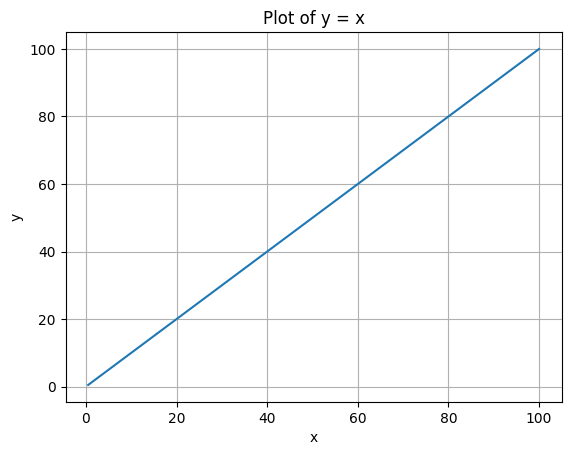

In [18]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.5, 100.5, 0.5)
y = x

plt.plot(x, y)
plt.title('Plot of y = x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

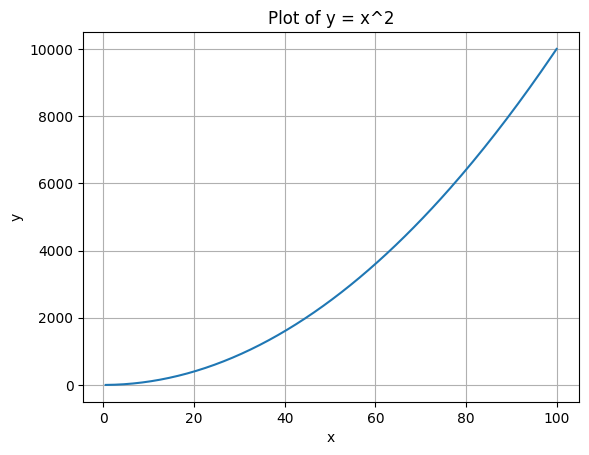

In [19]:

y = x**2
plt.plot(x, y)
plt.title('Plot of y = x^2')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

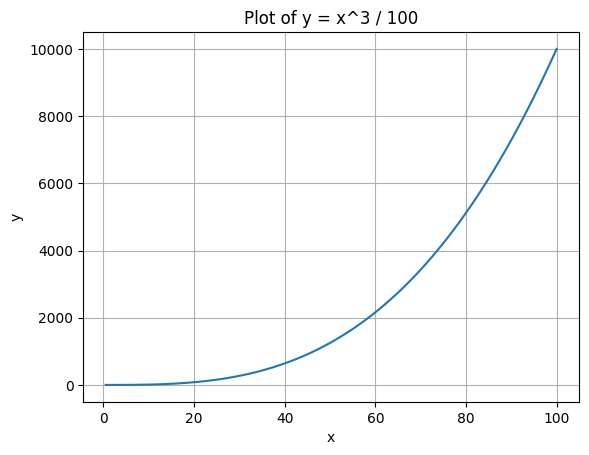

In [20]:
y = (x**3)/ 100
plt.plot(x, y)
plt.title('Plot of y = x^3 / 100')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

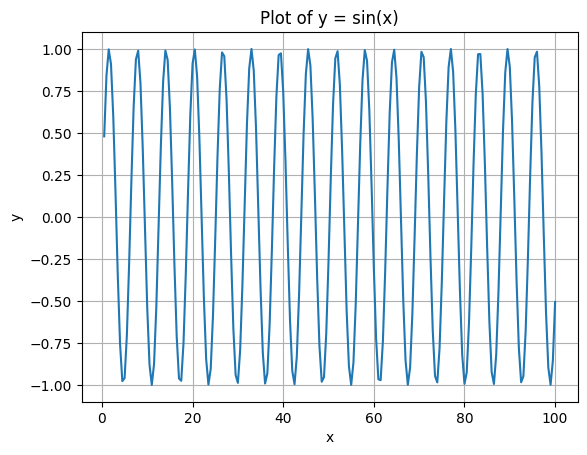

In [21]:
y = np.sin(x)

plt.plot(x, y)
plt.title('Plot of y = sin(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

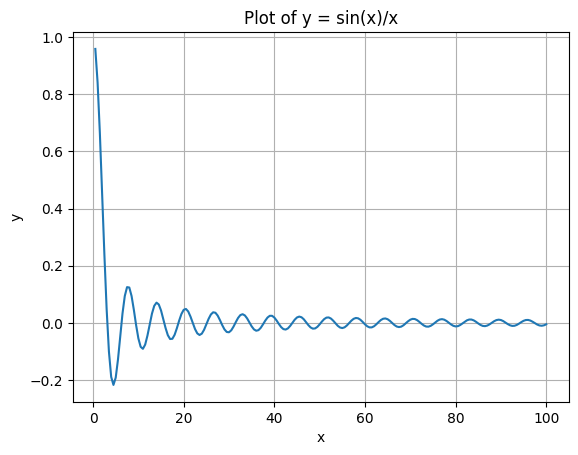

In [22]:
y = np.sin(x) / x

plt.plot(x, y)
plt.title('Plot of y = sin(x)/x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

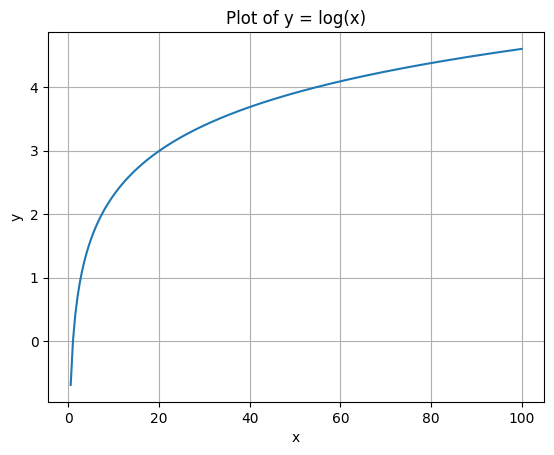

In [23]:
y = np.log(x)

plt.plot(x, y)
plt.title('Plot of y = log(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

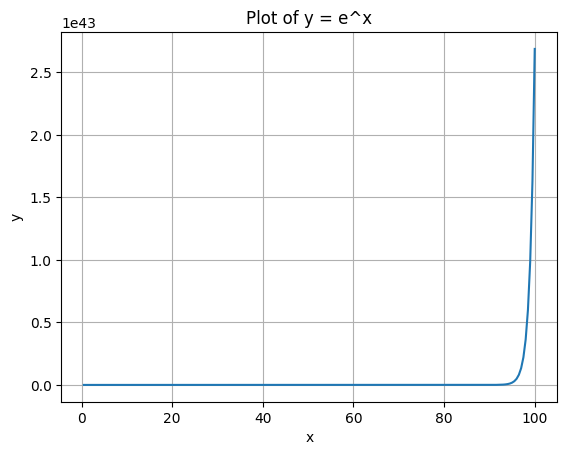

In [24]:
y = np.exp(x)

plt.plot(x, y)
plt.title('Plot of y = e^x')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

# Question 10

In [25]:
import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, (20, 5))
D = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

c_with_highest_std = D.std().idxmax()
r_with_lowest_mean = D.mean(axis=1).idxmin()

print(D)
print("column with the highest standard deviation :", c_with_highest_std)
print("roe with lowet mean", r_with_lowest_mean)

           a         b         c         d         e
0   1.657449  1.338152  1.812973  1.142888  1.135355
1   1.054194  1.265246  1.478580  1.878606  1.120429
2   1.614575  1.661361  1.249767  1.640989  1.943396
3   1.585794  1.310300  1.823213  1.328936  1.875519
4   1.424155  1.066702  1.061658  1.638252  1.861238
5   1.178764  1.221124  1.219611  1.691499  1.270078
6   1.936938  1.191665  1.330256  1.103628  1.948509
7   1.783212  1.446934  1.251524  1.031394  1.807218
8   1.985593  1.734826  1.606543  1.421771  1.776558
9   1.845162  1.101239  1.622717  1.493125  1.303003
10  1.439936  1.632754  1.470090  1.780147  1.903402
11  1.112699  1.514486  1.439834  1.504552  1.438077
12  1.133122  1.109680  1.541675  1.065749  1.407784
13  1.266099  1.478577  1.028023  1.651516  1.864599
14  1.902194  1.142515  1.833555  1.819255  1.225420
15  1.963772  1.970354  1.312377  1.606644  1.769039
16  1.045006  1.189065  1.099120  1.242890  1.232320
17  1.422128  1.423365  1.674534  1.412774  1.

# Question 11

In [26]:
import numpy as np
import pandas as pd

D['f'] = D[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

D['g'] = D['f'].apply(lambda x: 'LT8' if x < 8 else 'GT8')

num_rows_lt8 = (D['g'] == 'LT8').sum()

std_dev_lt8 = D[D['g'] == 'LT8']['f'].std()
std_dev_gt8 = D[D['g'] == 'GT8']['f'].std()

print("Number of rows where 'g' is 'LT8':", num_rows_lt8)
print("Standard deviation of 'f' where 'g' is 'LT8':", std_dev_lt8)
print("Standard deviation of 'f' where 'g' is 'GT8':", std_dev_gt8)


Number of rows where 'g' is 'LT8': 16
Standard deviation of 'f' where 'g' is 'LT8': 0.6113438247778135
Standard deviation of 'f' where 'g' is 'GT8': 0.24214694406788795


# Question 12

In [27]:
# The term broadcast describes how NumPy treats array with different shapes when performing the arithmetic operations,it allows small array to broadcast across the larger arrays so they have compatible shape.

# example 1

a = np.array([10, 20, 30])
b = 2

ans = a*b

print("array a :", a)
print("scalar b :", b)
print("answer :", ans)
print("\n")

# in the above example 'a' is 1D array, 'b' is a scalar, when perform a*b NumPy broadcast scalar b across array 'a' now 'b' become [2, 2, 2] and after that element wise multiplication performed

# example 2
a1 = np.array([1, 2, 3])

b1 = np.array([[4, 5, 6],
              [7, 8, 9],
              [10, 11, 12]])

ans2 = a1 + b1

print("1D array a1 :", a1)
print("2D b2 :", b1)
print("answer :", ans2)

# In this case, a is 1D array and b is a 2D array. When adding a to b, NumPy broadcasts a along the second dimension of b, a becomes [[1, 2, 3], [1, 2, 3], [1, 2, 3]], and then element-wise addition is performed.

array a : [10 20 30]
scalar b : 2
answer : [20 40 60]


1D array a1 : [1 2 3]
2D b2 : [[ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
answer : [[ 5  7  9]
 [ 8 10 12]
 [11 13 15]]


# Question 13

In [28]:
def argmin(arr) :
    if len(arr) == 0 :
        return -1
    min_ind = 0
    min_ele = arr[0]
    for ind in range(1, len(arr)) :
        if arr[ind] < min_ele :
            min_ind = ind
            min_ele = arr[ind]
            
    return min_ind

arr = np.array([5, 8, 9, 7, 11, 45, 2, 0, 7, 77])
ind = argmin(arr)
print("Index of minimum element :" , ind)  

# Verify with NumPy's argmin
assert ind == np.argmin(arr)

Index of minimum element : 7
